# Importar librerías

In [6]:
from pylab import rand,plot,show,norm

# Clase Perceptron

In [10]:
class Perceptron:
 def __init__(self):
  """ inicialización del perceptron  """
  self.w = rand(2)*2-1 # pesos
  self.tasaAprendizaje = 0.1 

 def respuesta(self,x):
  """ saldia del perceptron """
  y = x[0]*self.w[0]+x[1]*self.w[1] # producto punto entre w y x
  if y >= 0:
   return 1
  else:
   return -1

 def actualizarPesos(self,x,iterError):
  """
  Actualizar estatus de los pesos, w en un tiempo t+1 es w(t+1)= w(t) + learningRate*(d-r)*x
  donde d es la salida deseada y r la respuesta del perceptro, iteError es la diferencia entre
  d y r (d-r).
  """
  self.w[0] += self.tasaAprendizaje*iterError*x[0]
  self.w[1] += self.tasaAprendizaje*iterError*x[1]

 def entrenamiento(self,data):
  """ 
  Entra todo el vector en los datos, cada vector en los datos debe tener 3 elementos,
  el tercer elemento (x[2]) debe ser etiquetado (salida deseada)
  """
  learned = False
  iteration = 0
  while not learned:
   globalError = 0.0
   for x in data: # por cada muestra
    r = self.respuesta(x)    
    if x[2] != r: # si tenemos un respuesta equivocada
     iterError = x[2] - r # respuesta deseada-respuesta actual
     self.actualizarPesos(x,iterError)
     globalError += abs(iterError)
   iteration += 1
   if globalError == 0.0 or iteration >= 100: # detiene por el criterio
    print ('iterations {}'.format(iteration))
    learned = True # detiene el aprendizaje
    

In [11]:
def datosGenerados(n):
    """
    genera un conjunto de datos, de dos dimensiones,  linealmente separados con
    n muestras. El tercer elemento de la muestra es la etiqueta.
    """
    xb = (rand(n)*2-1)/2-0.5
    yb = (rand(n)*2-1)/2+0.5
    xr = (rand(n)*2-1)/2+0.5
    yr = (rand(n)*2-1)/2-0.5
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i],yb[i],1])
        inputs.append([xr[i],yr[i],-1])
    return inputs

iterations 1


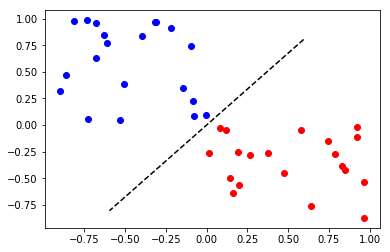

In [12]:
trainset = datosGenerados(30) # generación de datos para entrenar
perceptron = Perceptron()   # Instancia del perceptron
perceptron.entrenamiento(trainset)  # Entrenamiento con el conjunto de datos
testset = datosGenerados(20)  # conjunto de datos para el test.

# Prueba del perceptron
for x in testset:
 r = perceptron.respuesta(x)
 if r != x[2]: # Si la respuesta no es correcta
  print ('error')
 if r == 1:
  plot(x[0],x[1],'ob')  
 else:
  plot(x[0],x[1],'or')

# Se gráfica una línea de separación, la cual es ortogonal a w.
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

## Los puntos azules pertenecen a la primera clase y los rojos pertenecen a la segunda. La línea punteada es la línea de separación que el perceptrón aprendió durante el entrenamiento.